<a href="https://colab.research.google.com/github/candidobri2/datasetonibus/blob/main/An%C3%A1lise_onibus_fortaleza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de demanda dos terminais e linhas de ônibus da cidade de Fortaleza - José Candido Brito Neto

In [1]:
import numpy as np

## E agora o que eu vou fazer?

- Qual é a proporção de pagantes x gratuidades e meias-entradas nos ônibus de Fortaleza? FEITO
- Quais são as linhas que possuem a maior e menor demanda de Fortaleza? (Nos dias úteis e nos fins de semana) (levando em consideração que alguns ônibus tem mais viagens que outros) FEITO
- Relação dos ônibus que mais recebem estudantes e dos ônibus que mais recebem idosos percentualmente.
- Comparativo entre os terminais rodoviários de passageiros.
- Como funciona a sazionalidade durante a semana, quais dias são mais lotados digamos assim.
- Quais são os ônibus com maior média de passageiros por viagem (vou precisar saber quantas viagens cada ônibus fez)
- Verificar se encontro algum outlier em determinados dias de alguma ou algumas linhas.


Esse é o meu primeiro projeto de análise de dados usando Python. Nele, eu usarei os dados disponibilizados pela ETUFOR, que constam o número de passageiros que passaram pelos terminais ou linhas de ônibus durante os meses de janeiro e fevereiro de 2022.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Primeiro vamos carregar os dados das duas planilhas no formato CSV (comma separated values)

# Limpeza dos dados

## Importando a demanda de janeiro, ajeitando as colunas e adicionando um cabeçalho.

In [3]:
demanda_jan = pd.read_csv("./demanda_202201.csv")

In [4]:
demanda_jan

,2022-01-01;1;Terminal Antônio Bezerra ;3;Estudante;3
0,2022-01-01;1;Terminal Antônio Bezerra ...
1,2022-01-01;1;Terminal Antônio Bezerra ...
2,2022-01-01;1;Terminal Antônio Bezerra ...
3,2022-01-01;1;Terminal Antônio Bezerra ...
4,2022-01-01;1;Terminal Antônio Bezerra ...
...,...
86028,2022-01-31;920;Papicu/Caça e Pesca ...
86029,2022-01-31;920;Papicu/Caça e Pesca ...
86030,2022-01-31;999;Quilometragem/Terminal ...
86031,2022-01-31;999;Quilometragem/Terminal ...


Quanto importei pela primeira vez, os dados se mostraram sem cabeçalho e com um erro grave, que é não separar as colunas. Tive que ver a questão das colunas e descobri um parametro da read_csv que é o _sep_. O problema acontece porque a separação default do csv é a virgula, e a separação do meu arquivo está como ponto e vírgula. Então vamos mudar.

In [5]:
demanda_jan = pd.read_csv("./demanda_202201.csv",sep=";")

In [6]:
demanda_jan

,2022-01-01,1,Terminal Antônio Bezerra,3,Estudante,3.1
0,2022-01-01,1,Terminal Antônio Bezerra,4,Gratuidade Idoso,666
1,2022-01-01,1,Terminal Antônio Bezerra,5,Vale-transporte (vermelho),2
2,2022-01-01,1,Terminal Antônio Bezerra,11,Idoso Identificação,97
3,2022-01-01,1,Terminal Antônio Bezerra,12,Estudante com débito,873
4,2022-01-01,1,Terminal Antônio Bezerra,16,Grat. Deficiente - S/Acomp,4
...,...,...,...,...,...,...
86028,2022-01-31,920,Papicu/Caça e Pesca,32,Gratuidade Infantil,2
86029,2022-01-31,920,Papicu/Caça e Pesca,37,VT Beneficio Piloto BUM,3
86030,2022-01-31,999,Quilometragem/Terminal,4,Gratuidade Idoso,23
86031,2022-01-31,999,Quilometragem/Terminal,11,Idoso Identificação,1


Agora precisamos consertar o problema com o cabeçalho, vou testar adicionando in-place com:

In [7]:
#demanda_jan[0] = ["Data", "ID", "Nome", "ID Passageiro","Tipo Passageiro","Quantidade" ] ##deu ruim

Olhando no google, vi que podemos adicionar um cabeçalho por meio do método _columns_

In [8]:
demanda_jan.columns = ["Data", "ID", "Nome", "ID Passageiro","Tipo Passageiro","Quantidade" ] 

In [9]:
demanda_jan

,Data,ID,Nome,ID Passageiro,Tipo Passageiro,Quantidade
0,2022-01-01,1,Terminal Antônio Bezerra,4,Gratuidade Idoso,666
1,2022-01-01,1,Terminal Antônio Bezerra,5,Vale-transporte (vermelho),2
2,2022-01-01,1,Terminal Antônio Bezerra,11,Idoso Identificação,97
3,2022-01-01,1,Terminal Antônio Bezerra,12,Estudante com débito,873
4,2022-01-01,1,Terminal Antônio Bezerra,16,Grat. Deficiente - S/Acomp,4
...,...,...,...,...,...,...
86028,2022-01-31,920,Papicu/Caça e Pesca,32,Gratuidade Infantil,2
86029,2022-01-31,920,Papicu/Caça e Pesca,37,VT Beneficio Piloto BUM,3
86030,2022-01-31,999,Quilometragem/Terminal,4,Gratuidade Idoso,23
86031,2022-01-31,999,Quilometragem/Terminal,11,Idoso Identificação,1


## Características do dataframe - demanda_jan | Agora vamos dar uma olhada nas características do dataframe da demanda do mês de janeiro.

In [10]:
demanda_jan.shape ### Temos 86033 linhas 

(86033, 6)

O dataframe possui mais de 86 mil linhas referentes a informações de diferentes linhas de ônibus e terminais

In [11]:
demanda_jan.isnull().sum()

Data               0
ID                 0
Nome               0
ID Passageiro      0
Tipo Passageiro    0
Quantidade         0
dtype: int64

In [12]:
id = demanda_jan["ID"]

In [13]:
demanda_jan.iloc[86030]

Data                                             2022-01-31
ID                                                      999
Nome               Quilometragem/Terminal                  
ID Passageiro                                             4
Tipo Passageiro                            Gratuidade Idoso
Quantidade                                               23
Name: 86030, dtype: object

In [14]:
demanda_jan.describe()

,ID,ID Passageiro,Quantidade
count,86033.000000,86033.000000,86033.000000
mean,385.378680,13.905467,145.243639
std,267.756535,10.536421,391.016026
min,1.000000,2.000000,1.000000
25%,102.000000,5.000000,3.000000
50%,359.000000,11.000000,13.000000
75%,632.000000,16.000000,84.000000
max,999.000000,37.000000,6031.000000


Podemos tirar algumas informações daqui. Temos 86.033 quantidades diferentes, o número máximo em um tipo de passageiro foi 6031. Em que ônibus será que foi?


## Importando o dataframe do mês de fevereiro

In [15]:
dem_fev = pd.read_csv("./demanda_202202.csv",sep=";")

In [16]:
dem_fev

,DataMovimento,CodLinha,NomeLinha,TipoPassageiro,NomePassageiro,Demanda
0,01/02/2022,1,Terminal Antônio Bezerra,3,Estudante,35
1,01/02/2022,1,Terminal Antônio Bezerra,4,Gratuidade Idoso,2884
2,01/02/2022,1,Terminal Antônio Bezerra,5,Vale-transporte (vermelho),8
3,01/02/2022,1,Terminal Antônio Bezerra,11,Idoso Identificação,411
4,01/02/2022,1,Terminal Antônio Bezerra,12,Estudante com débito,1194
...,...,...,...,...,...,...
80543,28/02/2022,920,Papicu/Caça e Pesca,32,Gratuidade Infantil,1
80544,28/02/2022,920,Papicu/Caça e Pesca,37,VT Beneficio Piloto BUM,2
80545,28/02/2022,999,Quilometragem/Terminal,4,Gratuidade Idoso,2
80546,28/02/2022,999,Quilometragem/Terminal,11,Idoso Identificação,15


Bom, temos algumas surpresas aqui com o mês de fevereiro. Aparentemente temos menos linhas de ônibus ou novos tipos de passageiros, pois o dataframe possui 80548 linhas. E dessa vez os dados possuem cabeçalho, para ficar igual ao anterior eu irei modificar o cabeçalho com o comando columns

In [17]:
dem_fev.columns = ["Data", "ID", "Nome", "ID Passageiro","Tipo Passageiro","Quantidade" ]

O formato das datas estão diferentes, lá na frente isso me deu problema, então vou ajeitar aqui por meio do _apply_

In [18]:
dem_fev["Data"] = dem_fev["Data"].apply(lambda x: str(x.split("/")[2])+"-"+str(x.split("/")[1])+"-"+str(x.split("/")[0]))

In [19]:
dem_fev

,Data,ID,Nome,ID Passageiro,Tipo Passageiro,Quantidade
0,2022-02-01,1,Terminal Antônio Bezerra,3,Estudante,35
1,2022-02-01,1,Terminal Antônio Bezerra,4,Gratuidade Idoso,2884
2,2022-02-01,1,Terminal Antônio Bezerra,5,Vale-transporte (vermelho),8
3,2022-02-01,1,Terminal Antônio Bezerra,11,Idoso Identificação,411
4,2022-02-01,1,Terminal Antônio Bezerra,12,Estudante com débito,1194
...,...,...,...,...,...,...
80543,2022-02-28,920,Papicu/Caça e Pesca,32,Gratuidade Infantil,1
80544,2022-02-28,920,Papicu/Caça e Pesca,37,VT Beneficio Piloto BUM,2
80545,2022-02-28,999,Quilometragem/Terminal,4,Gratuidade Idoso,2
80546,2022-02-28,999,Quilometragem/Terminal,11,Idoso Identificação,15


In [20]:
dem_fev.isna().sum() ##Não temos dados vazios.

Data               0
ID                 0
Nome               0
ID Passageiro      0
Tipo Passageiro    0
Quantidade         0
dtype: int64

## PROBLEMA 1: temos mais linhas nesse, ou temos mais tipos de passageiros?

#### Abordagem 1 - Podemos ver a quantidade de valores único na coluna ID

In [21]:
unico_jan = demanda_jan["ID"].unique()
print(len(unico_jan))

333


Nós temos 333 valores diferentes na coluna ID do dataframe demanda_jan, isso nos sugere (mas não garante) que temos 333 linhas de ônibus diferentes. Agora vamos ver no fevereiro

In [22]:
dem_fev["ID"].unique().shape

(332,)

Em fevereiro nós temos 332 valores únicos de ID, 1 a menos que janeiro, o que é uma surpresa, vamos ver a intereseção desses dois arrays. Podemos acessar isso por meio do método np.instersect1d

In [23]:
unico_janeiro = demanda_jan["ID"].unique() #array com valores unicos de ID
unico_fevereiro = dem_fev["ID"].unique() ##array com valores únicos de ID


In [24]:
np.intersect1d(unico_janeiro,unico_fevereiro).shape #ID que estão nas duas dataframes

(324,)

In [25]:
diferenca = np.setxor1d(unico_fevereiro,unico_janeiro) 
print(diferenca)


[ 13  62  98 151 221 324 354 363 762 767 770 870 919 946 949 970 986]


In [26]:
just_in_jan = np.intersect1d(diferenca,unico_janeiro)
print(just_in_jan)

[ 13  62  98 151 324 354 762 767 919]


In [27]:
justinfev = np.intersect1d(diferenca,unico_fevereiro)
print(justinfev)

[221 363 770 870 946 949 970 986]


Portanto, podemos tirar de conclusão que as linhas 13,62,98,151,324,254,762,767,919 estão na tabela de demanda de janeiro mas não em fevereiro. E as linhas 221,363,770,870,946,949,970,986 estão em fevereiro mas não estão em janeiro. Note que fevereiro tem uma a menos, por isso a diferença que vimos anteriormente.

**Vamos tentar exibir os nome destas linhas de alguma forma**

In [28]:
demanda_jan.loc[demanda_jan["ID"] == just_in_jan[7]] 

,Data,ID,Nome,ID Passageiro,Tipo Passageiro,Quantidade
71918,2022-01-26,767,Vila Velha/North Shopping/Riomar Kennedy,2,Popular,2
71919,2022-01-26,767,Vila Velha/North Shopping/Riomar Kennedy,3,Estudante,13
71920,2022-01-26,767,Vila Velha/North Shopping/Riomar Kennedy,4,Gratuidade Idoso,111
71921,2022-01-26,767,Vila Velha/North Shopping/Riomar Kennedy,11,Idoso Identificação,45
71922,2022-01-26,767,Vila Velha/North Shopping/Riomar Kennedy,12,Estudante com débito,103
71923,2022-01-26,767,Vila Velha/North Shopping/Riomar Kennedy,15,Projovem,3
71924,2022-01-26,767,Vila Velha/North Shopping/Riomar Kennedy,16,Grat. Deficiente - S/Acomp,3
71925,2022-01-26,767,Vila Velha/North Shopping/Riomar Kennedy,37,VT Beneficio Piloto BUM,1


In [29]:
dem_fev.loc[dem_fev["ID"] == justinfev[7]] 

,Data,ID,Nome,ID Passageiro,Tipo Passageiro,Quantidade
14704,2022-02-05,986,Antônio Bezerra/Halleluya/Castelão,28,Transbordo,22


## Resumo da ópera: acredito que posso tirar essas linhas da contagem porque pelo visto elas não contam tanto assim e são linhas e dias muitos específicos. Outro ponto importante é que as linhas a mais não são justificadas por diferentes nomes de ônibus mas sim por outro coisa que precisamos investigar. Portanto vamos retirar essas linhas do nosso dataframes.

#### Retirar as linhas "ruins" dos dataframes

In [30]:
for i in just_in_jan:
  demanda_jan.drop(demanda_jan[demanda_jan["ID"]==i].index, inplace=True)
  # pega o index dos elementos de demanda_jan onde demanda_jan["id"] é igual a cada um dos números de just in jan

In [31]:
demanda_jan["ID"].unique().shape

(324,)

In [32]:
for i in justinfev:
  dem_fev.drop(dem_fev[dem_fev["ID"]==i].index,inplace=True)

In [33]:
dem_fev["ID"].unique().shape

(324,)

O código acima "garante" que os dois dataframes possuem a mesma quantidade de IDs únicos. Mas o dem_fec tem mais linhas, vamos saber os valores únicos dos tipos de passageiros e comparar os dois.


In [34]:
tipos_arr_jan = demanda_jan["ID Passageiro"].unique()

In [35]:
tipos_arr_fev = dem_fev["ID Passageiro"].unique()

In [36]:
np.setxor1d(tipos_arr_jan,tipos_arr_fev) #np.setxor1d mostra valores que não pertencem aos dois arrays

array([], dtype=int64)

Isso nos diz que os tipos de passageiros nos meses de janeiro e fevereiro são iguais.

In [37]:
tipos_arr_jan

array([ 4,  5, 11, 12, 16, 37,  2, 27,  3,  6,  9, 15, 31, 32, 28, 33,  7])

In [38]:
print(dem_fev.shape[0])
print(demanda_jan.shape[0])

80480
85982


## Uma explicação para fevereiro ter menos linhas é que o mês possui menos dias.

# Juntando os dois dataframes em um só - merge e concat

In [39]:
demanda = pd.concat([demanda_jan,dem_fev])

In [40]:
demanda

,Data,ID,Nome,ID Passageiro,Tipo Passageiro,Quantidade
0,2022-01-01,1,Terminal Antônio Bezerra,4,Gratuidade Idoso,666
1,2022-01-01,1,Terminal Antônio Bezerra,5,Vale-transporte (vermelho),2
2,2022-01-01,1,Terminal Antônio Bezerra,11,Idoso Identificação,97
3,2022-01-01,1,Terminal Antônio Bezerra,12,Estudante com débito,873
4,2022-01-01,1,Terminal Antônio Bezerra,16,Grat. Deficiente - S/Acomp,4
...,...,...,...,...,...,...
80543,2022-02-28,920,Papicu/Caça e Pesca,32,Gratuidade Infantil,1
80544,2022-02-28,920,Papicu/Caça e Pesca,37,VT Beneficio Piloto BUM,2
80545,2022-02-28,999,Quilometragem/Terminal,4,Gratuidade Idoso,2
80546,2022-02-28,999,Quilometragem/Terminal,11,Idoso Identificação,15


In [41]:
demanda.head(53731)

,Data,ID,Nome,ID Passageiro,Tipo Passageiro,Quantidade
0,2022-01-01,1,Terminal Antônio Bezerra,4,Gratuidade Idoso,666
1,2022-01-01,1,Terminal Antônio Bezerra,5,Vale-transporte (vermelho),2
2,2022-01-01,1,Terminal Antônio Bezerra,11,Idoso Identificação,97
3,2022-01-01,1,Terminal Antônio Bezerra,12,Estudante com débito,873
4,2022-01-01,1,Terminal Antônio Bezerra,16,Grat. Deficiente - S/Acomp,4
...,...,...,...,...,...,...
53748,2022-01-20,349,Cj Veneza Tropical/Mirasol II,37,VT Beneficio Piloto BUM,1
53749,2022-01-20,350,Av. José Bastos/Lagoa,3,Estudante,13
53750,2022-01-20,350,Av. José Bastos/Lagoa,4,Gratuidade Idoso,447
53751,2022-01-20,350,Av. José Bastos/Lagoa,5,Vale-transporte (vermelho),3


Percebi aqui, que juntou-se os dataframes, mas o índice não é um só, ele volta pro 0 ao chegar na primeira linha do segundo dataframe

In [42]:
demanda_2 = pd.merge(demanda_jan,dem_fev,how="outer")

In [43]:
demanda_2.isna().sum()

Data               0
ID                 0
Nome               0
ID Passageiro      0
Tipo Passageiro    0
Quantidade         0
dtype: int64

In [44]:
demanda_2

,Data,ID,Nome,ID Passageiro,Tipo Passageiro,Quantidade
0,2022-01-01,1,Terminal Antônio Bezerra,4,Gratuidade Idoso,666
1,2022-01-01,1,Terminal Antônio Bezerra,5,Vale-transporte (vermelho),2
2,2022-01-01,1,Terminal Antônio Bezerra,11,Idoso Identificação,97
3,2022-01-01,1,Terminal Antônio Bezerra,12,Estudante com débito,873
4,2022-01-01,1,Terminal Antônio Bezerra,16,Grat. Deficiente - S/Acomp,4
...,...,...,...,...,...,...
166457,2022-02-28,920,Papicu/Caça e Pesca,32,Gratuidade Infantil,1
166458,2022-02-28,920,Papicu/Caça e Pesca,37,VT Beneficio Piloto BUM,2
166459,2022-02-28,999,Quilometragem/Terminal,4,Gratuidade Idoso,2
166460,2022-02-28,999,Quilometragem/Terminal,11,Idoso Identificação,15


Aprendemos então que o merge une os dois dataframes incluindo o índice e o concat apenas cola os dois dataframes.

# 2) Quais as 5  linhas de ônibus de Fortaleza que mais passam passageiros nos dias da semana?

In [45]:
qtd = demanda_2.groupby("ID").sum()["Quantidade"]
print(type(qtd))
ranking = demanda_2.groupby("ID").sum()["Quantidade"].rank(method="max")

<class 'pandas.core.series.Series'>


In [46]:
qtd

ID
1      236709
2       25848
3      494176
4       77783
5       60809
        ...  
906    201328
907     51724
913     65482
920    124091
999      3564
Name: Quantidade, Length: 324, dtype: int64

### COMO FOI O PROCESSO?
Travei um pouco em como fazer, mas usei o groupby pra juntar tudo baseado no ID, com a função de soma, depois, baseado na coluna quantidade usei o comando rank para determinar quem tinha mais ou menos demanda.

In [47]:
ranking.sort_values()

ID
20       1.0
40       2.0
774      3.0
95       4.0
326      5.0
       ...  
42     320.0
712    321.0
76     322.0
41     323.0
3      324.0
Name: Quantidade, Length: 324, dtype: float64

Depois rodei esse sort_values, me assustei com o resultado porque deu coincidentemente o Campus do Pici como o mais lotado. Mas, NINGUÉM PASSA NA CATRACA DO CAMPUS DO PICI. Percebi então que a coluna estava do menor para o maior, então devemos usar o argumento ascending

In [48]:
ranking.sort_values(ascending=False).head(6)

ID
3      324.0
41     323.0
76     322.0
712    321.0
42     320.0
74     319.0
Name: Quantidade, dtype: float64

Agora sim, temos o ranking na ordem correta. Agora é só ver quais linhas se referem os index.

**DÚVIDA: COMO FAZER ISSO MAIS PYTHONICO?**

In [49]:
demanda_2.loc[demanda_2["ID"]==3]["Nome"]

12        Terminal Parangaba I                    
13        Terminal Parangaba I                    
14        Terminal Parangaba I                    
15        Terminal Parangaba I                    
16        Terminal Parangaba I                    
                            ...                   
163605    Terminal Parangaba I                    
163606    Terminal Parangaba I                    
163607    Terminal Parangaba I                    
163608    Terminal Parangaba I                    
163609    Terminal Parangaba I                    
Name: Nome, Length: 766, dtype: object

In [50]:
demanda_2.loc[demanda_2["ID"]==41]

,Data,ID,Nome,ID Passageiro,Tipo Passageiro,Quantidade
220,2022-01-01,41,Parangaba/Oliveira Paiva/Papicu,3,Estudante,5
221,2022-01-01,41,Parangaba/Oliveira Paiva/Papicu,4,Gratuidade Idoso,982
222,2022-01-01,41,Parangaba/Oliveira Paiva/Papicu,5,Vale-transporte (vermelho),21
223,2022-01-01,41,Parangaba/Oliveira Paiva/Papicu,9,Vt. Identificação,12
224,2022-01-01,41,Parangaba/Oliveira Paiva/Papicu,11,Idoso Identificação,116
...,...,...,...,...,...,...
163854,2022-02-28,41,Parangaba/Oliveira Paiva/Papicu,15,Projovem,11
163855,2022-02-28,41,Parangaba/Oliveira Paiva/Papicu,16,Grat. Deficiente - S/Acomp,175
163856,2022-02-28,41,Parangaba/Oliveira Paiva/Papicu,31,Vt. Institucional,5
163857,2022-02-28,41,Parangaba/Oliveira Paiva/Papicu,32,Gratuidade Infantil,2


In [51]:
demanda_2.loc[demanda_2["ID"]==76]

,Data,ID,Nome,ID Passageiro,Tipo Passageiro,Quantidade
405,2022-01-01,76,Cj Ceará/Aldeota/Papicu,3,Estudante,5
406,2022-01-01,76,Cj Ceará/Aldeota/Papicu,4,Gratuidade Idoso,1021
407,2022-01-01,76,Cj Ceará/Aldeota/Papicu,5,Vale-transporte (vermelho),2
408,2022-01-01,76,Cj Ceará/Aldeota/Papicu,9,Vt. Identificação,14
409,2022-01-01,76,Cj Ceará/Aldeota/Papicu,11,Idoso Identificação,85
...,...,...,...,...,...,...
164116,2022-02-28,76,Cj Ceará/Aldeota/Papicu,15,Projovem,5
164117,2022-02-28,76,Cj Ceará/Aldeota/Papicu,16,Grat. Deficiente - S/Acomp,132
164118,2022-02-28,76,Cj Ceará/Aldeota/Papicu,31,Vt. Institucional,6
164119,2022-02-28,76,Cj Ceará/Aldeota/Papicu,32,Gratuidade Infantil,4


In [52]:
demanda_2.loc[demanda_2["ID"]==712]

,Data,ID,Nome,ID Passageiro,Tipo Passageiro,Quantidade
1847,2022-01-01,712,Cj Palmeiras/Papicu,2,Popular,13
1848,2022-01-01,712,Cj Palmeiras/Papicu,3,Estudante,72
1849,2022-01-01,712,Cj Palmeiras/Papicu,4,Gratuidade Idoso,571
1850,2022-01-01,712,Cj Palmeiras/Papicu,5,Vale-transporte (vermelho),3
1851,2022-01-01,712,Cj Palmeiras/Papicu,11,Idoso Identificação,60
...,...,...,...,...,...,...
166137,2022-02-28,712,Cj Palmeiras/Papicu,15,Projovem,36
166138,2022-02-28,712,Cj Palmeiras/Papicu,16,Grat. Deficiente - S/Acomp,134
166139,2022-02-28,712,Cj Palmeiras/Papicu,31,Vt. Institucional,2
166140,2022-02-28,712,Cj Palmeiras/Papicu,32,Gratuidade Infantil,6


In [53]:
demanda_2.loc[demanda_2["ID"]==42]

,Data,ID,Nome,ID Passageiro,Tipo Passageiro,Quantidade
231,2022-01-01,42,Antônio Bezerra/Francisco Sá/Papicu,3,Estudante,12
232,2022-01-01,42,Antônio Bezerra/Francisco Sá/Papicu,4,Gratuidade Idoso,964
233,2022-01-01,42,Antônio Bezerra/Francisco Sá/Papicu,5,Vale-transporte (vermelho),20
234,2022-01-01,42,Antônio Bezerra/Francisco Sá/Papicu,9,Vt. Identificação,23
235,2022-01-01,42,Antônio Bezerra/Francisco Sá/Papicu,11,Idoso Identificação,87
...,...,...,...,...,...,...
163866,2022-02-28,42,Antônio Bezerra/Francisco Sá/Papicu,15,Projovem,23
163867,2022-02-28,42,Antônio Bezerra/Francisco Sá/Papicu,16,Grat. Deficiente - S/Acomp,137
163868,2022-02-28,42,Antônio Bezerra/Francisco Sá/Papicu,31,Vt. Institucional,2
163869,2022-02-28,42,Antônio Bezerra/Francisco Sá/Papicu,32,Gratuidade Infantil,3


In [54]:
demanda_2.loc[demanda_2["ID"]==74]

,Data,ID,Nome,ID Passageiro,Tipo Passageiro,Quantidade
387,2022-01-01,74,Antônio Bezerra/Unifor,3,Estudante,3
388,2022-01-01,74,Antônio Bezerra/Unifor,4,Gratuidade Idoso,434
389,2022-01-01,74,Antônio Bezerra/Unifor,5,Vale-transporte (vermelho),14
390,2022-01-01,74,Antônio Bezerra/Unifor,9,Vt. Identificação,3
391,2022-01-01,74,Antônio Bezerra/Unifor,11,Idoso Identificação,57
...,...,...,...,...,...,...
164095,2022-02-28,74,Antônio Bezerra/Unifor,16,Grat. Deficiente - S/Acomp,123
164096,2022-02-28,74,Antônio Bezerra/Unifor,31,Vt. Institucional,3
164097,2022-02-28,74,Antônio Bezerra/Unifor,32,Gratuidade Infantil,3
164098,2022-02-28,74,Antônio Bezerra/Unifor,33,Vale-Trasnporte ENEM,1


In [55]:
linhas = {"041 - Parangaba/Oliveira Paiva/Papicu":qtd[41],"076 - Conjunto Ceará/Aldeota/Papicu":qtd[76],"712 - Conjunto Palmeiras/Papicu":qtd[712],"042 - Antônio Bezerra/Francisco Sá/Papicu":qtd[42],"074 - Antônio Bezerra/Unifor": qtd[74]}

linhas

{'041 - Parangaba/Oliveira Paiva/Papicu': 452383,
 '076 - Conjunto Ceará/Aldeota/Papicu': 431214,
 '712 - Conjunto Palmeiras/Papicu': 429077,
 '042 - Antônio Bezerra/Francisco Sá/Papicu': 394844,
 '074 - Antônio Bezerra/Unifor': 356597}

# 3) Quais as 5 linhas que possuem a maior demanda de passageiros nos finais de semana?

In [56]:
demanda_2.groupby("ID").sum()["Quantidade"].shape

(324,)

Um desafio é saber quais dias são da semana e quais dias são fins de semana. Vamos tentar usando o bdate_range, pra isso vamos ver se a coluna data é do tipo data.

In [57]:
demanda_2.dtypes
demanda_2["Data"] = pd.to_datetime(demanda_2["Data"])


In [58]:
demanda_2.dtypes

Data               datetime64[ns]
ID                          int64
Nome                       object
ID Passageiro               int64
Tipo Passageiro            object
Quantidade                  int64
dtype: object

In [59]:
def findWeekend(df):
  res = len(pd.bdate_range(df["Data"],df["Data"]))
  if res==0:
    return True
  else:
    return False


O pd.bdata_range retorna uma "lista" de datas que não são finais de semana. Portanto, eu peguei o tamanho dessa lista, se fosse 0 é porque a data é um fim de semana, se fosse 1 é porque a data era um dia da semana. Fiz essa lógica dentro de uma função que usava o dataframe como parâmetro.

In [60]:
demanda_2["Final de semana"] = demanda_2.apply(findWeekend, axis=1)

Depois, apliquei a uma nova coluna chamada Final de Semana a função apply que roda a função que está como parâmetro e passa o valor para a nova coluna.

In [61]:
df_mask = demanda_2["Final de semana"] == True
demanda_fds = demanda_2[df_mask]

In [62]:
demanda_fds.shape

(43043, 7)

In [63]:

ranking_fds = demanda_fds.groupby("ID").sum()["Quantidade"].rank(method="max")
rank_fds = demanda_fds.groupby("ID").sum()["Quantidade"]

In [64]:

demanda_fds.groupby("ID").sum()["Quantidade"].shape

(294,)

30 linhas de ônibus não apareceram no dataframe, possivelmente porque não funcionam em um fim de semana.

In [65]:
ranking_fds.sort_values(ascending=False).head(11)

ID
52     294.0
51     293.0
41     292.0
3      291.0
712    290.0
42     289.0
76     288.0
752    287.0
45     286.0
855    285.0
755    284.0
Name: Quantidade, dtype: float64

In [66]:
idx_fds = ranking_fds.sort_values(ascending=False).head(11).index

In [67]:
fds = rank_fds.loc[idx_fds]

In [68]:
fds


ID
52     111173
51     106220
41     105936
3       96898
712     95092
42      80929
76      69254
752     62434
45      52863
855     50751
755     48930
Name: Quantidade, dtype: int64

In [69]:
linhas = demanda_2.drop_duplicates(subset=['ID']).set_index("ID")["Nome"]

In [70]:
fds =fds.reset_index()
fds["Nome"] = fds['ID'].map(linhas)

In [71]:
fds

,ID,Quantidade,Nome
0,52,111173,Grande Circular II
1,51,106220,Grande Circular I
2,41,105936,Parangaba/Oliveira Paiva/Papicu
3,3,96898,Terminal Parangaba I
4,712,95092,Cj Palmeiras/Papicu
5,42,80929,Antônio Bezerra/Francisco Sá/Papicu
6,76,69254,Cj Ceará/Aldeota/Papicu
7,752,62434,Caça e Pesca/Centro
8,45,52863,Cj Ceará/Papicu/Montese
9,855,50751,Bezerra de Menezes/Washington Soares


In [72]:
fds2 = fds.reindex(index=fds.index[::-1])

In [73]:
fds2 = fds2.drop(3)

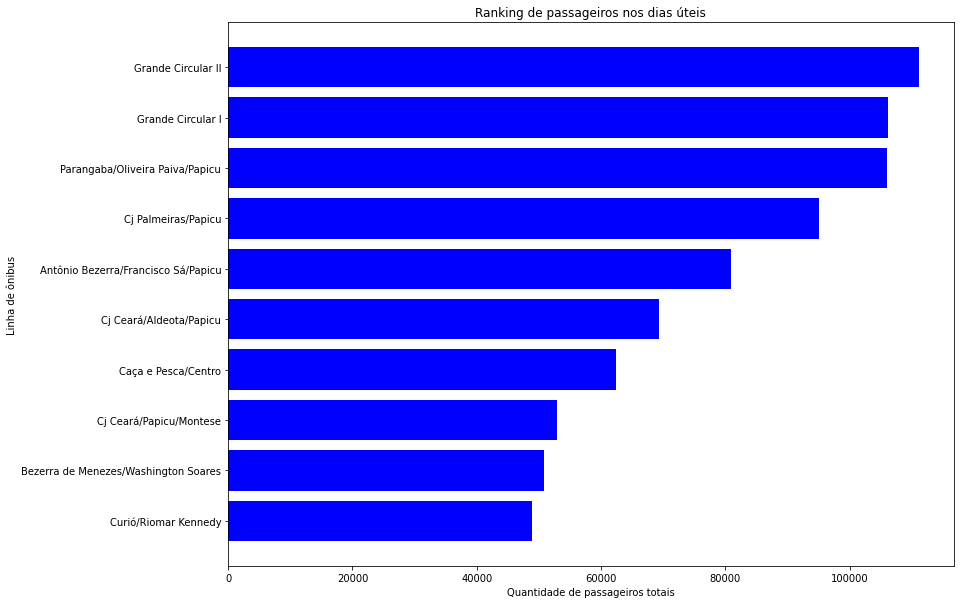

In [74]:
x_fds = list(fds2["Nome"])
x_fds = [s.strip() for s in x_fds]

y_fds = fds2["Quantidade"]


plt.figure(figsize=(13, 10)) 
plt.barh(x_fds,y_fds,color="blue")

plt.xlabel("Quantidade de passageiros totais")
plt.ylabel("Linha de ônibus")
plt.title("Ranking de passageiros nos dias úteis")
plt.savefig("ranking_fds2.png", format="png", bbox_inches='tight')

### Quais as 5 linhas que possuem a maior demanda de passageiros totais nos dias da semana?

In [75]:
df_mask = demanda_2["Final de semana"] == False
demanda_bday = demanda_2[df_mask]

In [76]:
demanda_bday.shape

(123419, 7)

In [77]:
demanda_bday

,Data,ID,Nome,ID Passageiro,Tipo Passageiro,Quantidade,Final de semana
4235,2022-01-03,1,Terminal Antônio Bezerra,3,Estudante,36,False
4236,2022-01-03,1,Terminal Antônio Bezerra,4,Gratuidade Idoso,2989,False
4237,2022-01-03,1,Terminal Antônio Bezerra,5,Vale-transporte (vermelho),18,False
4238,2022-01-03,1,Terminal Antônio Bezerra,11,Idoso Identificação,379,False
4239,2022-01-03,1,Terminal Antônio Bezerra,12,Estudante com débito,1473,False
...,...,...,...,...,...,...,...
166457,2022-02-28,920,Papicu/Caça e Pesca,32,Gratuidade Infantil,1,False
166458,2022-02-28,920,Papicu/Caça e Pesca,37,VT Beneficio Piloto BUM,2,False
166459,2022-02-28,999,Quilometragem/Terminal,4,Gratuidade Idoso,2,False
166460,2022-02-28,999,Quilometragem/Terminal,11,Idoso Identificação,15,False


In [78]:

rank_bday = demanda_bday.groupby("ID").sum()["Quantidade"]
ranking_bday = demanda_bday.groupby("ID").sum()["Quantidade"].rank(method="max")


In [79]:
rank_bday

ID
1      192222
2       13848
3      397278
4       77783
5       46056
        ...  
906    164502
907     43850
913     55777
920     88222
999      1491
Name: Quantidade, Length: 317, dtype: int64

In [80]:
ranking_bday.shape

(317,)

In [81]:
ranking_bday.sort_values(ascending=False).head(11)
idx_semana = ranking_bday.sort_values(ascending=False).head(11).index

In [82]:
demanda_semanaUtil = rank_bday.loc[idx_semana]

In [83]:
demanda_semanaUtil

ID
3      397278
76     361960
41     346447
712    333985
42     313915
74     311228
50     306141
755    301841
855    277201
754    270896
45     266372
Name: Quantidade, dtype: int64

In [84]:
semana = demanda_2.drop_duplicates(subset=['ID']).set_index("ID")["Nome"]

In [85]:
demanda_semanaUtil = demanda_semanaUtil.reset_index()
demanda_semanaUtil["Nome"] = demanda_semanaUtil['ID'].map(semana)

In [86]:
demanda_semanaUtil

,ID,Quantidade,Nome
0,3,397278,Terminal Parangaba I
1,76,361960,Cj Ceará/Aldeota/Papicu
2,41,346447,Parangaba/Oliveira Paiva/Papicu
3,712,333985,Cj Palmeiras/Papicu
4,42,313915,Antônio Bezerra/Francisco Sá/Papicu
5,74,311228,Antônio Bezerra/Unifor
6,50,306141,Siqueira/Papicu/Washington Soares
7,755,301841,Curió/Riomar Kennedy
8,855,277201,Bezerra de Menezes/Washington Soares
9,754,270896,Granja Lisboa/Goiabeiras


In [87]:
semana_util = demanda_semanaUtil.reindex(index=demanda_semanaUtil.index[::-1])

In [88]:
semana_util = semana_util.drop(0)

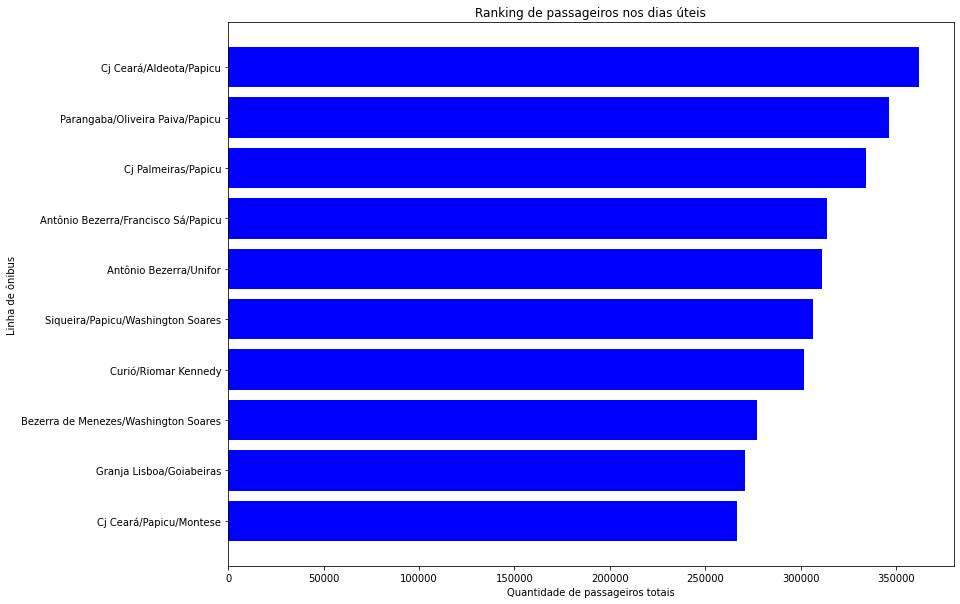

In [89]:
x_linha = list(semana_util["Nome"])
x_linha = [s.strip() for s in x_linha]

y_dias = semana_util["Quantidade"]


plt.figure(figsize=(13, 10)) 
plt.barh(x_linha,y_dias,color="blue")

plt.xlabel("Quantidade de passageiros totais")
plt.ylabel("Linha de ônibus")
plt.title("Ranking de passageiros nos dias úteis")
plt.savefig("ranking_uteis.png", format="png", bbox_inches='tight')

# 4) Qual a proporção de pagantes x gratuidades em Fortaleza.

Primeiro vamos ver quantos ID de passageiros existem, e avaliar quais são pagos e gratuitos.

In [90]:
demanda_2

,Data,ID,Nome,ID Passageiro,Tipo Passageiro,Quantidade,Final de semana
0,2022-01-01,1,Terminal Antônio Bezerra,4,Gratuidade Idoso,666,True
1,2022-01-01,1,Terminal Antônio Bezerra,5,Vale-transporte (vermelho),2,True
2,2022-01-01,1,Terminal Antônio Bezerra,11,Idoso Identificação,97,True
3,2022-01-01,1,Terminal Antônio Bezerra,12,Estudante com débito,873,True
4,2022-01-01,1,Terminal Antônio Bezerra,16,Grat. Deficiente - S/Acomp,4,True
...,...,...,...,...,...,...,...
166457,2022-02-28,920,Papicu/Caça e Pesca,32,Gratuidade Infantil,1,False
166458,2022-02-28,920,Papicu/Caça e Pesca,37,VT Beneficio Piloto BUM,2,False
166459,2022-02-28,999,Quilometragem/Terminal,4,Gratuidade Idoso,2,False
166460,2022-02-28,999,Quilometragem/Terminal,11,Idoso Identificação,15,False


In [91]:
tipos_passageiro = demanda_2["ID Passageiro"].unique()

In [92]:
tipos_passageiro

array([ 4,  5, 11, 12, 16, 37,  2, 27,  3,  6,  9, 15, 31, 32, 28, 33,  7])

In [93]:
len(tipos_passageiro)










17

Temos 17 tipos diferentes de passageiros (maneiras de pagar passagem.

O código abaixo separa as linhas pelo tipo de passageiro e soma as quantidades gerando o seguinte dataframe:

In [94]:
df_tipo_passageiro = demanda_2.groupby("Tipo Passageiro").sum()["Quantidade"]

In [95]:
df_tipo_passageiro

Tipo Passageiro
Crachá Empresas                        7583
Estudante                            330529
Estudante com débito                8281646
Grat. Deficiente - S/Acomp           718802
Gratuidade Identificação Ettusa           4
Gratuidade Idoso                   12740376
Gratuidade Infantil                   22060
Idoso Identificação                 3045964
Pagante Horário Diferenciado         202663
Popular                               95857
Projovem                              72209
Transbordo                            18315
VT Beneficio Piloto BUM              107807
Vale-Trasnporte ENEM                    177
Vale-transporte (vermelho)            94711
Vt. Identificação                    279306
Vt. Institucional                     24417
Name: Quantidade, dtype: int64

In [96]:
df_exibicao = df_tipo_passageiro.reset_index()

Depois somamos as quantidades de passageiros com gratuidade. Para a meia passagem dividimos a quantidade por dois para ficar metade das pessoas com valor cheio e metade gratuito.

In [97]:
pagos = df_tipo_passageiro.iloc[[8,9,10,11,12,13,14,15,16]].sum() + \
              df_tipo_passageiro[["Estudante","Estudante com débito"]].sum()*0.5

In [98]:
gratuidades = df_tipo_passageiro.iloc[[0,3,4,5,6,7]].sum() + \
              df_tipo_passageiro[["Estudante","Estudante com débito"]].sum()*0.5

In [99]:
gratuidades

20840876.5

In [100]:
pagos

5201549.5

In [101]:
total = df_tipo_passageiro.sum() ###total de quantidades juntando tudo

In [102]:
pct_gratis = gratuidades/total
print(pct_gratis*100)

80.02663231144442


In [103]:
pct_pago = pagos/total
print(pct_pago*100)

19.97336768855559


In [104]:
pct_pago + pct_gratis ##conferindo se o valor bate.

1.0

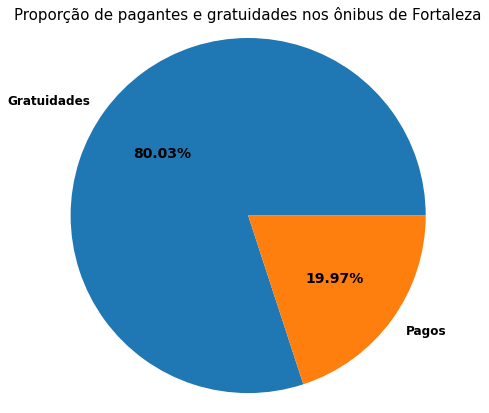

In [105]:
labels = ["Gratuidades" ,"Pagos"]
sizes = [pct_gratis,pct_pago]


plt.figure(figsize=(7,7)) 
wedges,texts,autotexts = plt.pie(sizes,labels=labels,autopct='%.2f%%')
plt.setp(autotexts,size=14,weight="bold")
plt.setp(texts,size=12,weight="bold")

#plt.xlabel("Quantidade de passageiros totais")
#plt.ylabel("Linha de ônibus")
plt.title("Proporção de pagantes e gratuidades nos ônibus de Fortaleza",fontsize=15)
#plt.savefig("ranking_uteis.png", format="png", bbox_inches='tight')



plt.axis("equal")



plt.savefig("percentual_gratuidades.png", format="png", bbox_inches='tight')

# Ranking por porcentagem de estudantes e idosos

## 1 - Estudantes

Vamos criar um dataframe a partir do principal apenas com passagens pagas por estudantes. O operador | significa ou, o operador or não funciona nessa situação

In [106]:
df_estudante = demanda_2[(demanda_2["ID Passageiro"] == 12) | (demanda_2["ID Passageiro"]==3)]

Depois, separamos a quantidade de passageiros por cada linha de ônibus representada no dataframe por "ID"

In [107]:
df_nestudante = df_estudante.groupby("ID").sum()["Quantidade"]

In [108]:
df_nestudante

ID
1       69239
2        2942
3      134822
4       31360
5       22979
        ...  
906     72432
907     19206
913     21169
920     42422
999       736
Name: Quantidade, Length: 324, dtype: int64

In [109]:
df_nestudante = df_nestudante.reset_index()
df_nestudante.columns = ["ID", "Estudantes"]

In [110]:
df_nestudante

,ID,Estudantes
0,1,69239
1,2,2942
2,3,134822
3,4,31360
4,5,22979
...,...,...
319,906,72432
320,907,19206
321,913,21169
322,920,42422


Resetamos o index para ficar com cara de dataframe, e nomeamos a coluna estudante que representa a quantidade de estudantes.

Como queremos achar o percentual de estudantes dentro do total de passageiros, agora vamos pegar a informação do número de passageiros totais de cada linha.

In [111]:
total_passageiros = demanda_2.groupby("ID").sum()["Quantidade"]

In [112]:
total_passageiros = total_passageiros.reset_index()

In [113]:
total_passageiros

,ID,Quantidade
0,1,236709
1,2,25848
2,3,494176
3,4,77783
4,5,60809
...,...,...
319,906,201328
320,907,51724
321,913,65482
322,920,124091


In [114]:
df_nestudante["Total"] = total_passageiros["Quantidade"] 

Uma nova coluna foi criada com o número total de passaageiros por linha.

In [115]:
df_nestudante

,ID,Estudantes,Total
0,1,69239,236709
1,2,2942,25848
2,3,134822,494176
3,4,31360,77783
4,5,22979,60809
...,...,...,...
319,906,72432,201328
320,907,19206,51724
321,913,21169,65482
322,920,42422,124091


In [116]:
#rank_estudante = df_estudante.groupby("ID").sum()["Quantidade"].rank(method="max")

In [117]:
#rank_estudante

In [118]:
#df_nestudante

Agora para calcular o percetual, basta dividir o número de estudantes pelo numero total, vamos fazer isso usando a função percentual juntamente com o método apply do Pandas.

In [119]:
def percentual(df):
  return (df["Estudantes"]/df["Total"])*100

df_nestudante["Percentual"] = df_nestudante.apply(percentual, axis=1)

In [120]:
df_nestudante

,ID,Estudantes,Total,Percentual
0,1,69239,236709,29.250683
1,2,2942,25848,11.381925
2,3,134822,494176,27.282183
3,4,31360,77783,40.317293
4,5,22979,60809,37.788814
...,...,...,...,...
319,906,72432,201328,35.977112
320,907,19206,51724,37.131699
321,913,21169,65482,32.327968
322,920,42422,124091,34.186202


#### Nota de rodapé de um erro que aconteceu e como resolvi

Agora temos o dataframe com todas as informações necessárias para fazer o ranking.

In [121]:
rank_estudante = df_nestudante["Percentual"].rank(method="min")


In [122]:
rank_estudante

0       64.0
1        5.0
2       41.0
3      310.0
4      287.0
       ...  
319    259.0
320    281.0
321    145.0
322    203.0
323     14.0
Name: Percentual, Length: 324, dtype: float64

In [123]:
rank_estudante.sort_values(ascending=False).head(30)

75     324.0
261    323.0
306    322.0
317    321.0
275    320.0
245    319.0
208    318.0
298    317.0
301    316.0
305    315.0
276    314.0
299    313.0
11     312.0
316    311.0
3      310.0
14     309.0
224    308.0
16     307.0
232    306.0
213    305.0
41     304.0
248    303.0
78     302.0
230    301.0
70     300.0
297    299.0
242    298.0
219    297.0
223    296.0
231    295.0
Name: Percentual, dtype: float64

Onde está o problema aqui, o rank estudante foi criado com o index do dataframe, e não com o ID da linha de ônibus, o ranking está correto mas pra sabermos o nome do ônibus é mais complicado.

Uma opção foi fazer um set_index para o ID, mas essa solução gerou o problema abaixo, vamos testar:

In [124]:
#df_nestudante = df_nestudante.set_index("ID")

In [125]:
#ranking_estudante = df_nestudante["Percentual"].rank(method="min")

In [126]:
#ranking_estudante #agora ele está usando o id

In [127]:
#ranking_estudante.sort_values(ascending=False).head(10)

O problema é que quando tentamos acessar as informações, o dataset não reconhece mais o comando

In [128]:
#df_nestudante[df_nestudante["ID"]==95]

In [129]:
#df_nestudante.iloc[0] # e usando o iloc ele usa o index de "lista" e não o ID

-------FIM DA NOTA DE RODAPÉ-------

#### Como foi solucionado?

Eu alterei o index pro ID mas em outro dataframe, e manti o df_nestudante do mesmo jeito.

In [130]:
df_nestudante2 = df_nestudante.set_index("ID")

Agora temos o dataframe com todas as informações necessárias para fazer o ranking.

In [131]:
mask = df_nestudante2['Total'] < 30000
df_nestudante3 = df_nestudante2.loc[~mask]

In [132]:
rank_estudante = df_nestudante3["Percentual"].rank(method="min")


Agora nosso rank está usando o ID da linha de ônibus, mas caso queiramos consultar as informações o df_nestudante ainda pode ser utilizado através da coluna ID

In [133]:
rank_estudante


ID
1       27.0
3       13.0
4      226.0
5      208.0
6      202.0
       ...  
905     93.0
906    186.0
907    203.0
913     91.0
920    140.0
Name: Percentual, Length: 232, dtype: float64

In [134]:
idx = rank_estudante.sort_values(ascending=False).head(10).index

O código acima aprendi em um post do stackover, pra que eu tivesse um dataframe só com os top 10 do ranking e com suas informações.

In [135]:
estudantes = df_nestudante2.loc[idx]

In [136]:
estudantes


,Estudantes,Total,Percentual
ID,,,
836,18597,42086,44.188091
640,25354,59833,42.374609
816,33724,80559,41.862486
825,19032,46279,41.124484
820,48806,120303,40.569229
901,16566,41031,40.374351
4,31360,77783,40.317293
617,21129,53146,39.756520
627,30559,76989,39.692683


Só falta agora colocar a linha de ônibus que pertence o ID, vou ver como fazer isso

In [137]:
s = demanda_2.drop_duplicates(subset=['ID']).set_index("ID")["Nome"]

In [138]:
estudantes= estudantes.reset_index()
estudantes["Nome"] = estudantes['ID'].map(s)

In [139]:
estudantes

,ID,Estudantes,Total,Percentual,Nome
0,836,18597,42086,44.188091,Cj Dona Yolanda Queiroz
1,640,25354,59833,42.374609,Cj Alvorada/Messejana
2,816,33724,80559,41.862486,Edson Queiróz/Centro
3,825,19032,46279,41.124484,Cidade Func/Papicu/Jardim das Oliveiras
4,820,48806,120303,40.569229,Papicu/Cj Alvorada
5,901,16566,41031,40.374351,Dom Luíz/ Papicu
6,4,31360,77783,40.317293,Messejana/Papicu/Cambeba/TJ
7,617,21129,53146,39.756520,Lagoa Redonda/Abreulândia/Direita
8,627,30559,76989,39.692683,Lagoa Redonda/Papicu
9,602,22171,56536,39.215721,Parque Pio XII/Ana Gonçalves


## 2 - Idosos

In [140]:
df_idosos = demanda_2[(demanda_2["ID Passageiro"] == 4) | (demanda_2["ID Passageiro"] == 11)]

In [141]:
df_idosos

,Data,ID,Nome,ID Passageiro,Tipo Passageiro,Quantidade,Final de semana
0,2022-01-01,1,Terminal Antônio Bezerra,4,Gratuidade Idoso,666,True
2,2022-01-01,1,Terminal Antônio Bezerra,11,Idoso Identificação,97,True
7,2022-01-01,2,Catraca Móvel/Terminal/Antônio Bezerra,4,Gratuidade Idoso,16,True
8,2022-01-01,2,Catraca Móvel/Terminal/Antônio Bezerra,11,Idoso Identificação,23,True
14,2022-01-01,3,Terminal Parangaba I,4,Gratuidade Idoso,696,True
...,...,...,...,...,...,...,...
166442,2022-02-28,913,Papicu/Serviluz/Varjota,11,Idoso Identificação,97,False
166450,2022-02-28,920,Papicu/Caça e Pesca,4,Gratuidade Idoso,1156,False
166453,2022-02-28,920,Papicu/Caça e Pesca,11,Idoso Identificação,160,False
166459,2022-02-28,999,Quilometragem/Terminal,4,Gratuidade Idoso,2,False


In [142]:
idosos = df_idosos.groupby("ID").sum()["Quantidade"]

In [143]:
idosos = idosos.reset_index()

In [144]:
idosos.columns = ["ID","Idosos"]

In [145]:
idosos["Total"] = total_passageiros["Quantidade"]


In [146]:
def percentual_idosos(df):
  return (df["Idosos"]/df["Total"])*100
idosos["Percentual"] = idosos.apply(percentual_idosos, axis=1)

In [147]:
idosos2 = idosos.set_index("ID")

In [148]:

mask = idosos2['Total'] < 10000
idosos3 = idosos2.loc[~mask]

In [149]:
idosos3

,Idosos,Total,Percentual
ID,,,
1,159528,236709,67.394142
2,5171,25848,20.005416
3,334464,494176,67.681150
4,40603,77783,52.200352
5,36435,60809,59.917118
...,...,...,...
905,53672,85797,62.556966
906,109794,201328,54.534888
907,29118,51724,56.294950


In [150]:
rank_idosos = idosos3["Percentual"].rank(method="min")


In [151]:
idx_idosos = rank_idosos.sort_values(ascending=False).head(12).index

In [152]:
ranking_idosos = idosos3.loc[idx_idosos]

In [153]:
ranking_idosos

,Idosos,Total,Percentual
ID,,,
331,25521,34104,74.832864
72,70117,98176,71.419695
10,112780,161334,69.904670
374,13460,19507,69.000871
243,20875,30272,68.958113
631,26993,39264,68.747453
706,74435,108886,68.360487
172,17845,26273,67.921440
3,334464,494176,67.681150


In [154]:
total_passageiros.shape[0] == idosos.shape[0]

True

Vamos consertar isso:

In [155]:
s = demanda_2.drop_duplicates(subset=['ID']).set_index("ID")["Nome"]

In [156]:
s

ID
1      Terminal Antônio Bezerra                
2        Catraca Móvel/Terminal/Antônio Bezerra
3      Terminal Parangaba I                    
5      Terminal Lagoa                          
6      Terminal Messejana                      
                         ...                   
140                    Vila do Mar/Centro II/ES
774                   Parangaba/Aterro/Abolição
20     Campus do Pici                          
40     Parangaba/Lagoa                         
860                    Clube dos Diários/Papicu
Name: Nome, Length: 324, dtype: object

In [157]:
idosos3.reset_index()

,ID,Idosos,Total,Percentual
0,1,159528,236709,67.394142
1,2,5171,25848,20.005416
2,3,334464,494176,67.681150
3,4,40603,77783,52.200352
4,5,36435,60809,59.917118
...,...,...,...,...
289,905,53672,85797,62.556966
290,906,109794,201328,54.534888
291,907,29118,51724,56.294950
292,913,40534,65482,61.900980


In [158]:
idosos3= idosos3.reset_index()
idosos3["Nome"] = idosos3['ID'].map(s)

In [159]:
ranking_idosos= ranking_idosos.reset_index()
ranking_idosos["Nome"] = ranking_idosos['ID'].map(s)

In [160]:
ranking_idosos = ranking_idosos[["ID","Nome","Idosos","Total","Percentual"]]

In [161]:
ranking_idosos

,ID,Nome,Idosos,Total,Percentual
0,331,Cj Esperança/Centro,25521,34104,74.832864
1,72,Antônio Bezerra/Parangaba,70117,98176,71.419695
2,10,Terminal Siqueira,112780,161334,69.904670
3,374,Aracapé/Centro,13460,19507,69.000871
4,243,Parque Universitários/Antônio Bezerra,20875,30272,68.958113
5,631,Carlos Albuquerque,26993,39264,68.747453
6,706,Barra do Ceará/Antônio Bezerra,74435,108886,68.360487
7,172,Antônio Bezerra/Lagoa/Parangaba,17845,26273,67.921440
8,3,Terminal Parangaba I,334464,494176,67.681150
9,1,Terminal Antônio Bezerra,159528,236709,67.394142


# Comparação entre terminais de ônibus

In [162]:
demanda_2

,Data,ID,Nome,ID Passageiro,Tipo Passageiro,Quantidade,Final de semana
0,2022-01-01,1,Terminal Antônio Bezerra,4,Gratuidade Idoso,666,True
1,2022-01-01,1,Terminal Antônio Bezerra,5,Vale-transporte (vermelho),2,True
2,2022-01-01,1,Terminal Antônio Bezerra,11,Idoso Identificação,97,True
3,2022-01-01,1,Terminal Antônio Bezerra,12,Estudante com débito,873,True
4,2022-01-01,1,Terminal Antônio Bezerra,16,Grat. Deficiente - S/Acomp,4,True
...,...,...,...,...,...,...,...
166457,2022-02-28,920,Papicu/Caça e Pesca,32,Gratuidade Infantil,1,False
166458,2022-02-28,920,Papicu/Caça e Pesca,37,VT Beneficio Piloto BUM,2,False
166459,2022-02-28,999,Quilometragem/Terminal,4,Gratuidade Idoso,2,False
166460,2022-02-28,999,Quilometragem/Terminal,11,Idoso Identificação,15,False


In [163]:
terminais = demanda_2[demanda_2["ID"]<11]

In [164]:
terminais = terminais.groupby("ID").sum()["Quantidade"]


In [165]:
terminais = terminais.reset_index()
terminais["Nome"] = terminais['ID'].map(s)

In [166]:
terminais=terminais[["ID","Nome","Quantidade"]]

In [167]:
terminais2 = terminais.copy()

In [168]:
terminais2["Quantidade"][0] = terminais["Quantidade"][0] + terminais["Quantidade"][1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [169]:
terminais2 = terminais2.drop([1,3])

In [170]:
terminais2 = terminais2.reset_index()

In [171]:
terminais2 = terminais2.drop(columns=["index"])

In [172]:
import matplotlib.pyplot as plt

x = terminais2["Nome"]
x2 = terminais2["Nome"]

In [173]:
x[0],x[1],x[2],x[3],x[4],x[5],x[6] = "A. Bezerra","Parangaba", "Lagoa","Messejana","Cj Ceará","Papicu", "Siqueira"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [174]:
x == x2

0    True
1    True
2    True
3    True
4    True
5    True
6    True
Name: Nome, dtype: bool

In [175]:
list(x2)

['A. Bezerra',
 'Parangaba',
 'Lagoa',
 'Messejana',
 'Cj Ceará',
 'Papicu',
 'Siqueira']

In [176]:
y = terminais2["Quantidade"]

In [177]:
y

0    262557
1    494176
2     60809
3    211256
4     77735
5     91450
6    161334
Name: Quantidade, dtype: int64

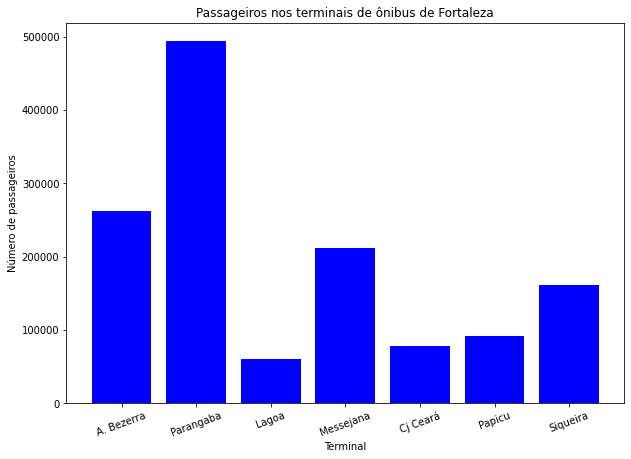

In [178]:
plt.figure(figsize=(10, 7)) 


plt.bar(x2,y,color="blue")
plt.xticks(x2,rotation=20)



plt.xlabel("Terminal")
plt.ylabel("Número de passageiros")
plt.title("Passageiros nos terminais de ônibus de Fortaleza")
plt.savefig("terminais.png", format="png", bbox_inches='tight')

# Distribuição de passageiros por dia da semana

Passo a passo:
- Agrupar os dados por cada dia da semana
- Fazer uma média com os próprios dias da semana (ex: tivemos 7 sábados em 2 meses, dividimos o total de passageiros por 7 e fazemos um gráfico de segunda a domingo)
- Usar o dataset apenas de dias da semana.
- Plotar o gráfico para cada dia

In [179]:
df_mask = demanda_2["Final de semana"] == False
df_semana = demanda_2[df_mask]

In [180]:
df_semana

,Data,ID,Nome,ID Passageiro,Tipo Passageiro,Quantidade,Final de semana
4235,2022-01-03,1,Terminal Antônio Bezerra,3,Estudante,36,False
4236,2022-01-03,1,Terminal Antônio Bezerra,4,Gratuidade Idoso,2989,False
4237,2022-01-03,1,Terminal Antônio Bezerra,5,Vale-transporte (vermelho),18,False
4238,2022-01-03,1,Terminal Antônio Bezerra,11,Idoso Identificação,379,False
4239,2022-01-03,1,Terminal Antônio Bezerra,12,Estudante com débito,1473,False
...,...,...,...,...,...,...,...
166457,2022-02-28,920,Papicu/Caça e Pesca,32,Gratuidade Infantil,1,False
166458,2022-02-28,920,Papicu/Caça e Pesca,37,VT Beneficio Piloto BUM,2,False
166459,2022-02-28,999,Quilometragem/Terminal,4,Gratuidade Idoso,2,False
166460,2022-02-28,999,Quilometragem/Terminal,11,Idoso Identificação,15,False


In [181]:
dias_semana = demanda_2.groupby("Data").sum()

In [182]:
dias_semana=dias_semana.reset_index()

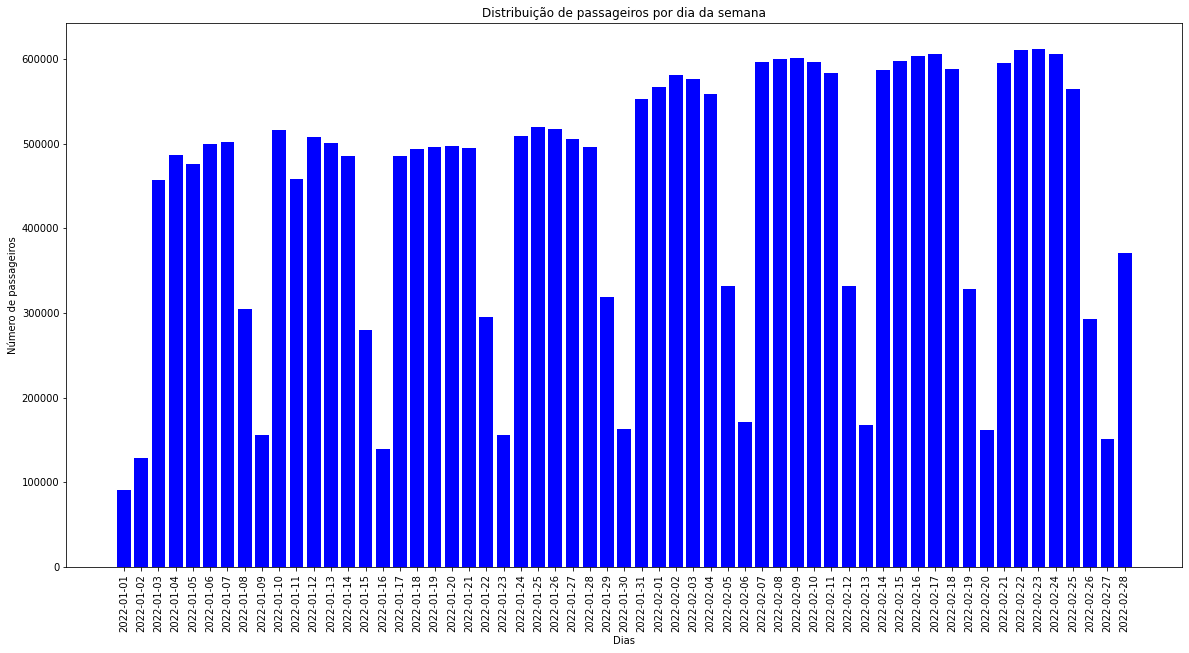

In [183]:
x_dias = list(dias_semana["Data"])
y_dias = dias_semana["Quantidade"]


plt.figure(figsize=(20, 10)) 
plt.bar(x_dias,y_dias,color="blue")


plt.xticks(x_dias,rotation=90)

plt.xlabel("Dias")
plt.ylabel("Número de passageiros")
plt.title("Distribuição de passageiros por dia da semana")
plt.savefig("serie_historica.png", format="png", bbox_inches='tight')

### Plotar os gráficos com média semana de janeiro e média semanal de fevereiro, e média total

In [184]:
import math

In [185]:
lista_semana = pd.Series(["Sábado", "Domingo", "Segunda","Terça","Quarta", "Quinta","Sexta"])
lista_semana = np.tile(lista_semana,math.ceil(dias_semana.shape[0]/7))

In [186]:
lista_semana = pd.Series(lista_semana)


In [187]:
dias_semana ["Dia"] = lista_semana

In [188]:
dias_semana

,Data,ID,ID Passageiro,Quantidade,Final de semana,Dia
0,2022-01-01,761310,28305,90800,2053,Sábado
1,2022-01-02,814881,30680,128612,2182,Domingo
2,2022-01-03,1137046,41144,457511,0,Segunda
3,2022-01-04,1152241,41421,486986,0,Terça
4,2022-01-05,1150198,41417,476648,0,Quarta
5,2022-01-06,1152270,41389,499692,0,Quinta
6,2022-01-07,1147857,41227,502715,0,Sexta
7,2022-01-08,993741,34233,304246,2532,Sábado
8,2022-01-09,864057,32033,156234,2271,Domingo
9,2022-01-10,1157633,42017,515953,0,Segunda


In [189]:
df_semanal = dias_semana.groupby("Dia").mean()

In [190]:
df_semanal = df_semanal.reset_index()

In [191]:
df_semanal = df_semanal.reindex([3,6,1,2,4,5,0])

In [192]:
df_semanal

,Dia,ID,ID Passageiro,Quantidade,Final de semana
3,Segunda,1.159739e+06,42117.222222,519106.000000,0.000000
6,Terça,1.164311e+06,42274.750000,542024.000000,0.000000
1,Quarta,1.163073e+06,42378.125000,549583.500000,0.000000
2,Quinta,1.158803e+06,42107.250000,548801.500000,0.000000
4,Sexta,1.167205e+06,42252.625000,534491.375000,0.000000
5,Sábado,9.742061e+05,34062.222222,286226.555556,2492.777778
0,Domingo,8.707370e+05,32408.111111,155025.555556,2289.777778


In [193]:
df_janeiro = dias_semana[:31]

In [194]:
df_janeiro_media = df_janeiro.groupby("Dia").mean()

In [195]:
df_janeiro_media

,ID,ID Passageiro,Quantidade,Final de semana
Dia,,,,
Domingo,856319.6,31938.80,148543.40,2261.6
Quarta,1143662.5,41246.50,499421.75,0.0
Quinta,1145105.0,41224.75,501194.50,0.0
Segunda,1156232.2,41908.80,504179.80,0.0
Sexta,1149592.5,41386.75,494911.25,0.0
Sábado,947681.2,33106.20,257925.40,2431.6
Terça,1145100.0,41387.50,489839.25,0.0


In [196]:

df_janeiro_media = df_janeiro_media.reset_index()

In [197]:
df_janeiro_media
df_janeiro_media=df_janeiro_media.reindex([3,6,1,2,4,5,0])

In [198]:
df_fevereiro_media = dias_semana[31:]

In [199]:
df_fevereiro_media
df_fevereiro_agrupado = df_fevereiro_media.groupby("Dia").mean()

In [200]:
df_fevereiro_agrupado = df_fevereiro_agrupado.reset_index()

In [201]:
df_fevereiro_agrupado=df_fevereiro_agrupado.reindex([3,6,1,2,4,5,0])

In [202]:
df_fevereiro_agrupado

,Dia,ID,ID Passageiro,Quantidade,Final de semana
3,Segunda,1164123.00,42377.75,537763.75,0.00
6,Terça,1183522.00,43162.00,594208.75,0.00
1,Quarta,1182483.50,43509.75,599745.25,0.00
2,Quinta,1172501.50,42989.75,596408.50,0.00
4,Sexta,1184818.00,43118.50,574071.50,0.00
5,Sábado,1007362.25,35257.25,321603.00,2569.25
0,Domingo,888758.75,32994.75,163128.25,2325.00


### Tirando os dois outliers

In [203]:
dias_semana2 = dias_semana.copy()

In [204]:
dias_semana2.drop(0,inplace=True)

In [205]:
dias_semana2.drop(58,inplace=True)

In [206]:
df_semanal2 = dias_semana2.groupby("Dia").mean()

In [207]:
df_semanal2 = df_semanal2.reset_index()

In [208]:
df_semanal2 = df_semanal2.reindex([3,6,1,2,4,5,0])

In [209]:
df_semanal2

,Dia,ID,ID Passageiro,Quantidade,Final de semana
3,Segunda,1165701.125,42439.750000,537662.000000,0.000000
6,Terça,1164311.000,42274.750000,542024.000000,0.000000
1,Quarta,1163073.000,42378.125000,549583.500000,0.000000
2,Quinta,1158803.250,42107.250000,548801.500000,0.000000
4,Sexta,1167205.250,42252.625000,534491.375000,0.000000
5,Sábado,1000818.125,34781.875000,310654.875000,2547.750000
0,Domingo,870737.000,32408.111111,155025.555556,2289.777778


In [210]:
df_janeiro2 = dias_semana2[:31]

In [211]:
df_janeiro_media2 = df_janeiro2.groupby("Dia").mean()

In [212]:
df_janeiro_media2

,ID,ID Passageiro,Quantidade,Final de semana
Dia,,,,
Domingo,856319.6,31938.80,148543.40,2261.60
Quarta,1143662.5,41246.50,499421.75,0.00
Quinta,1145105.0,41224.75,501194.50,0.00
Segunda,1156232.2,41908.80,504179.80,0.00
Sexta,1149592.5,41386.75,494911.25,0.00
Sábado,994274.0,34306.50,299706.75,2526.25
Terça,1152542.8,41681.60,505322.20,0.00


In [213]:

df_janeiro_media2 = df_janeiro_media2.reset_index()

In [214]:
df_janeiro_media2
df_janeiro_media2=df_janeiro_media2.reindex([3,6,1,2,4,5,0])

In [215]:
df_fevereiro_media2 = dias_semana2[31:]

In [216]:
df_fevereiro_media2
df_fevereiro_agrupado2 = df_fevereiro_media2.groupby("Dia").mean()

In [217]:
df_fevereiro_agrupado2 = df_fevereiro_agrupado2.reset_index()

In [218]:
df_fevereiro_agrupado2=df_fevereiro_agrupado2.reindex([3,6,1,2,4,5,0])

In [219]:
df_fevereiro_agrupado2

,Dia,ID,ID Passageiro,Quantidade,Final de semana
3,Segunda,1.181483e+06,43324.666667,593465.666667,0.00
6,Terça,1.183925e+06,43263.333333,603193.666667,0.00
1,Quarta,1.182484e+06,43509.750000,599745.250000,0.00
2,Quinta,1.172502e+06,42989.750000,596408.500000,0.00
4,Sexta,1.184818e+06,43118.500000,574071.500000,0.00
5,Sábado,1.007362e+06,35257.250000,321603.000000,2569.25
0,Domingo,8.887588e+05,32994.750000,163128.250000,2325.00


### Tirando os dois outliers

In [220]:
dias_semana2 = dias_semana.copy()

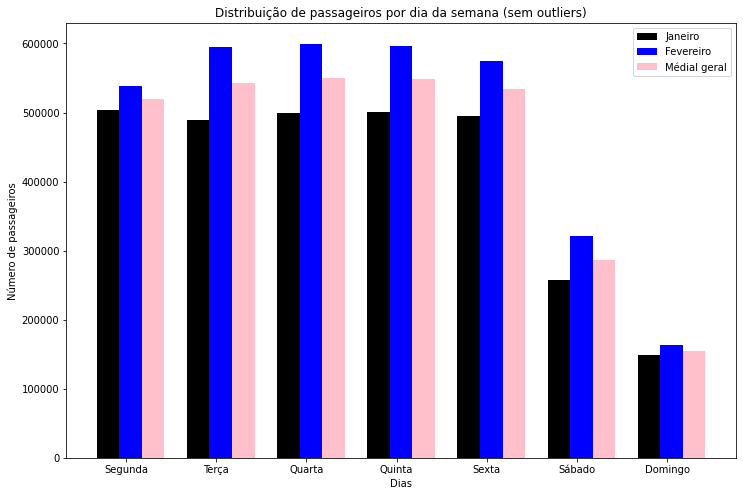

In [227]:
x_semanal = list(df_semanal["Dia"])
y_semanal = df_semanal["Quantidade"]

x_janeiro = list(df_janeiro_media["Dia"])
y_janeiro = df_janeiro_media["Quantidade"]

x_fevereiro = list(df_fevereiro_agrupado["Dia"])
y_fevereiro = df_fevereiro_agrupado["Quantidade"]


X_axis = np.arange(len(x_semanal))

plt.figure(figsize=(12, 8)) 

plt.bar(X_axis -0.2,y_janeiro,0.25,color="black", label = "Janeiro")
plt.bar(X_axis +0.05,y_fevereiro,0.25,color="blue", label = "Fevereiro")
plt.bar(X_axis +0.3,y_semanal,0.25,color="pink",label="Médial geral")


plt.xticks(X_axis,x_semanal)

plt.xlabel("Dias", fontweight=20)
plt.ylabel("Número de passageiros")
plt.title("Distribuição de passageiros por dia da semana (sem outliers)")
plt.legend()
plt.savefig("media_dias_.png", format="png", bbox_inches='tight')

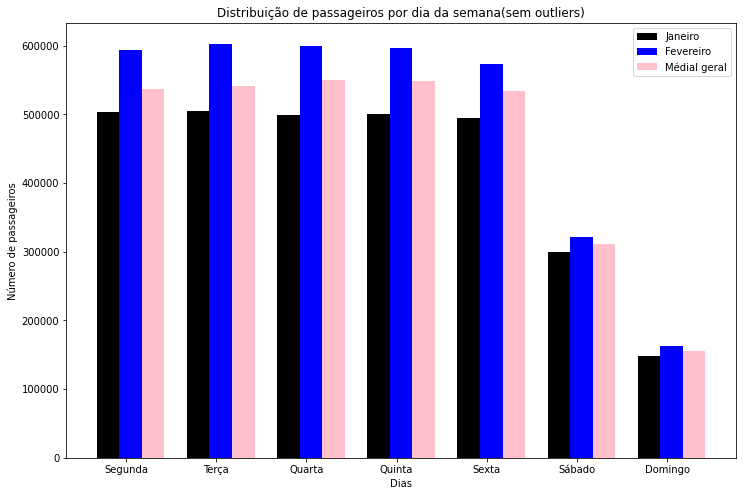

In [229]:
### gráfico sem outliers - a fazer
x2_semanal= list(df_semanal2["Dia"])
y2_semanal = df_semanal2["Quantidade"]

x2_janeiro = list(df_janeiro_media2["Dia"])
y2_janeiro = df_janeiro_media2["Quantidade"]

x2_fevereiro = list(df_fevereiro_agrupado2["Dia"])
y2_fevereiro = df_fevereiro_agrupado2["Quantidade"]

X_axis = np.arange(len(x2_semanal))

plt.figure(figsize=(12, 8)) 

plt.bar(X_axis -0.2,y2_janeiro,0.25,color="black", label = "Janeiro")
plt.bar(X_axis +0.05,y2_fevereiro,0.25,color="blue", label = "Fevereiro")
plt.bar(X_axis +0.3,y2_semanal,0.25,color="pink",label="Médial geral")


plt.xticks(X_axis,x2_semanal)

plt.xlabel("Dias", fontweight=20)
plt.ylabel("Número de passageiros")
plt.title("Distribuição de passageiros por dia da semana(sem outliers)")
plt.legend()
plt.savefig("media_dias2.png", format="png", bbox_inches='tight')

# Relação passageiros/chuvas

In [223]:
chuvas = pd.read_csv("./chuvas_fortaleza.csv")

FileNotFoundError: ignored

In [ ]:
df_janeiro_media

In [ ]:
df_fevereiro_agrupado

In [ ]:
dias_semana

In [ ]:
dias_semana["delta_media"] = 0

In [ ]:
dias_semana

In [ ]:
def mes(df):
  if df["Data"] <= pd.to_datetime("2022-01-31"):
    return "Janeiro"
  else:
    return "Fevereiro"

In [ ]:
dias_semana["Mês"] = dias_semana.apply(mes,axis=1)

In [ ]:
medias_janeiro = df_janeiro_media["Quantidade"]

In [ ]:
medias_fevereiro = df_fevereiro_agrupado["Quantidade"]

In [ ]:
medias_janeiro

In [ ]:
for index, rows in dias_semana.iterrows():
  if rows["Mês"] == "Janeiro" and rows["Dia"] == "Segunda":
    dias_semana.loc[index,"Média do dia"] = medias_janeiro[3]
  elif rows["Mês"] == "Janeiro" and rows["Dia"] == "Terça":
    dias_semana.loc[index,"Média do dia"] = medias_janeiro[6]
  elif rows["Mês"] == "Janeiro" and rows["Dia"] == "Quarta":
    dias_semana.loc[index,"Média do dia"] = medias_janeiro[1]
  elif rows["Mês"] == "Janeiro" and rows["Dia"] == "Quinta":
    dias_semana.loc[index,"Média do dia"] = medias_janeiro[2]
  elif rows["Mês"] == "Janeiro" and rows["Dia"] == "Sexta":
    dias_semana.loc[index,"Média do dia"] = medias_janeiro[4]
  elif rows["Mês"] == "Janeiro" and rows["Dia"] == "Sábado":
    dias_semana.loc[index,"Média do dia"] = medias_janeiro[5]
  elif rows["Mês"] == "Janeiro" and rows["Dia"] == "Domingo":
    dias_semana.loc[index,"Média do dia"] = medias_janeiro[0]

In [ ]:
for index, rows in dias_semana.iterrows():
  if rows["Mês"] == "Fevereiro" and rows["Dia"] == "Segunda":
    dias_semana.loc[index,"Média do dia"] = medias_fevereiro[3]
  elif rows["Mês"] == "Fevereiro" and rows["Dia"] == "Terça":
    dias_semana.loc[index,"Média do dia"] = medias_fevereiro[6]
  elif rows["Mês"] == "Fevereiro" and rows["Dia"] == "Quarta":
    dias_semana.loc[index,"Média do dia"] = medias_fevereiro[1]
  elif rows["Mês"] == "Fevereiro" and rows["Dia"] == "Quinta":
    dias_semana.loc[index,"Média do dia"] = medias_fevereiro[2]
  elif rows["Mês"] == "Fevereiro" and rows["Dia"] == "Sexta":
    dias_semana.loc[index,"Média do dia"] = medias_fevereiro[4]
  elif rows["Mês"] == "Fevereiro" and rows["Dia"] == "Sábado":
    dias_semana.loc[index,"Média do dia"] = medias_fevereiro[5]
  elif rows["Mês"] == "Fevereiro" and rows["Dia"] == "Domingo":
    dias_semana.loc[index,"Média do dia"] = medias_fevereiro[0]

In [ ]:
dias_semana

In [ ]:
def distancia_media(df):
  return df["Quantidade"] - df["Média do dia"]

In [ ]:
dias_semana["delta_media"] = dias_semana.apply(distancia_media,axis=1)

In [ ]:
dias_semana

In [ ]:
dias_semana2 = dias_semana.copy()


###DIfereneç sem outliers

In [ ]:
medias_janeiro2 = df_janeiro_media2["Quantidade"]

In [ ]:
medias_fevereiro2 = df_fevereiro_agrupado2["Quantidade"]

In [ ]:
for index, rows in dias_semana2.iterrows():
  if rows["Mês"] == "Janeiro" and rows["Dia"] == "Segunda":
    dias_semana2.loc[index,"Média do dia"] = medias_janeiro2[3]
  elif rows["Mês"] == "Janeiro" and rows["Dia"] == "Terça":
    dias_semana2.loc[index,"Média do dia"] = medias_janeiro2[6]
  elif rows["Mês"] == "Janeiro" and rows["Dia"] == "Quarta":
    dias_semana2.loc[index,"Média do dia"] = medias_janeiro2[1]
  elif rows["Mês"] == "Janeiro" and rows["Dia"] == "Quinta":
    dias_semana2.loc[index,"Média do dia"] = medias_janeiro2[2]
  elif rows["Mês"] == "Janeiro" and rows["Dia"] == "Sexta":
    dias_semana2.loc[index,"Média do dia"] = medias_janeiro2[4]
  elif rows["Mês"] == "Janeiro" and rows["Dia"] == "Sábado":
    dias_semana2.loc[index,"Média do dia"] = medias_janeiro2[5]
  elif rows["Mês"] == "Janeiro" and rows["Dia"] == "Domingo":
    dias_semana2.loc[index,"Média do dia"] = medias_janeiro2[0]

In [ ]:
for index, rows in dias_semana2.iterrows():
  if rows["Mês"] == "Fevereiro" and rows["Dia"] == "Segunda":
    dias_semana2.loc[index,"Média do dia"] = medias_fevereiro2[3]
  elif rows["Mês"] == "Fevereiro" and rows["Dia"] == "Terça":
    dias_semana2.loc[index,"Média do dia"] = medias_fevereiro2[6]
  elif rows["Mês"] == "Fevereiro" and rows["Dia"] == "Quarta":
    dias_semana2.loc[index,"Média do dia"] = medias_fevereiro2[1]
  elif rows["Mês"] == "Fevereiro" and rows["Dia"] == "Quinta":
    dias_semana2.loc[index,"Média do dia"] = medias_fevereiro2[2]
  elif rows["Mês"] == "Fevereiro" and rows["Dia"] == "Sexta":
    dias_semana2.loc[index,"Média do dia"] = medias_fevereiro2[4]
  elif rows["Mês"] == "Fevereiro" and rows["Dia"] == "Sábado":
    dias_semana2.loc[index,"Média do dia"] = medias_fevereiro2[5]
  elif rows["Mês"] == "Fevereiro" and rows["Dia"] == "Domingo":
    dias_semana2.loc[index,"Média do dia"] = medias_fevereiro2[0]

In [ ]:
chuvas

In [ ]:
def distancia_media2(df):
  return df["Quantidade"] - df["Média do dia"]

In [ ]:
dias_semana2["delta_media"] = dias_semana2.apply(distancia_media2,axis=1)

In [ ]:
dias_semana2

In [ ]:
dias_semana

In [ ]:
chuvas.drop(0,inplace=True)
chuvas.drop(58,inplace=True)

In [ ]:
dias_semana2["Chuva"] = chuvas["Chuva"]
dias_semana["Chuva"] = chuvas["Chuva"]

In [ ]:
dias_semana2

In [ ]:
dias_semana2.corr(method="spearman")

In [ ]:
dias_semana.corr(method='pearson')